<a href="https://colab.research.google.com/github/tnguyennr/Intro-to-Deep-Learning/blob/nlp_nat_disasters/Week4_Natural_distasters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement and Intro


In [ ]:
#Import Appropriate Librries
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
import keras

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
# from keras.models import Sequential
# from tensorflow.keras import layers, models
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/nlp-getting-started/train.csv')

In [ ]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data.describe()

,id,target
count,7552.000000,7552.000000
mean,5442.680614,0.427569
std,3111.921912,0.494759
min,48.000000,0.000000
25%,2759.750000,0.000000
50%,5408.500000,0.000000
75%,8126.500000,1.000000
max,10834.000000,1.000000


In [ ]:
#Too many different locations, so will not use this variable
data['location'].value_counts()

,count
location,
USA,104
New York,71
United States,50
London,45
Canada,29
...,...
"MontrÌ©al, QuÌ©bec",1
Montreal,1
"ÌÏT: 6.4682,3.18287",1


In [ ]:
data.isna().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


In [ ]:
data['keyword'].isna().sum()/len(data)

0.008012610009194798

In [ ]:
cleaned_data = data.dropna(subset = ['keyword'])

In [ ]:
cleaned_data.drop(['location', 'id'], axis = 1, inplace = True )

<ipython-input-40-7ea57edc32c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.drop(['location', 'id'], axis = 1, inplace = True )


In [ ]:
X = cleaned_data.drop('target', axis = 1)

In [ ]:
X.head()

,keyword,text
31,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...
32,ablaze,We always try to bring the heavy. #metal #RT h...
33,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...
34,ablaze,Crying out for more! Set me ablaze
35,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...


In [ ]:
X = cleaned_data.drop('target', axis = 1)
X['Combined_text_keyword'] = X['text'] + " " + X['keyword']
y = cleaned_data['target']




vectorizer = TfidfVectorizer()

# Fit and transform the tweets into TF-IDF features
#I don't need to transform output variable, so I can just remove that and feed everything else to the data?
#Should I be feeding all my data to this like a dataframe? Or just the text and keyword columns?
X_tfidf = vectorizer.fit_transform(X['Combined_text_keyword'])
X_dense = X_tfidf.todense()

# Convert the TF-IDF matrix into a dense array for easier reading
X_tensor = torch.tensor(X_dense, dtype = torch.float32)
y_tensor = torch.tensor(y.to_numpy(), dtype = torch.long)



# Once the text has been converted to tensors, we should be fitting the model
#Then we should train our constructed neural network on this data
#Then we compare results
#So next step is constructing neural network then fitting the data to it

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    X_tensor, y_tensor, test_size = 0.2, random_state = 43)

## Exploratory Analysis

<Axes: xlabel='target', ylabel='count'>

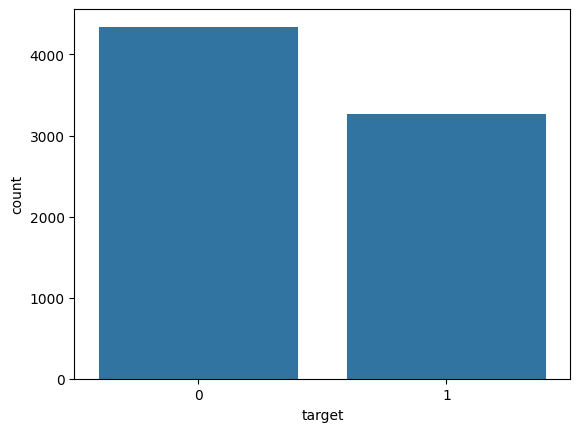

In [ ]:
#When am I supposed to see and then use this? Before I split the data so I can balance it? Or after because it in theory maintains the proportion

sns.countplot(data = data, x = 'target')


1 is for a real disaster, and 0 is not

There appear to be more tweets that aren't about real disasters than are

In [ ]:
data['target'].value_counts()

,count
target,
0,4342
1,3271


Todo:
- Convert text to format that can be fed to model - Use text embedding rather than word vectorization because this helps captures the semantic meanings of words more
  - Embeddings models are usually pre-trained (language?) models that apply weights and biases to words
- Find relationship between words and label - fit the model. Fit a couple of them
- Compare results from model with different configurations
- Conclusion based on problem

## Building Model and Choosing Architecture

In [ ]:
# Example usage:
input_size = 21622  # Size of the input feature vector (e.g., BERT embeddings)
hidden_size = 128
output_size = 2  # Binary classification (0 or 1)

### Model 1

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.layer2(x)
        return x


In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),  # Input -> Hidden
            nn.ReLU(),                           # Activation
            nn.Linear(hidden_size, output_size)   # Hidden -> Output
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
model1 = SimpleNN(input_size, hidden_size, output_size)



# Loss function: CrossEntropyLoss is common for multi-class or binary classification
criterion = nn.CrossEntropyLoss()

# Optimizer: Adam (or could use SGD)
optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)  # Initialize the optimizer



# Early stopping parameters
best_val_loss = np.inf  # Start with a very high value for best validation loss
patience = 3  # Number of epochs to wait for improvement in validation loss
patience_counter = 0  # Counter for how many epochs since the last improvement
best_model_state = None  # To store the best model weights

num_epochs = 10
for epoch in range(num_epochs):
    # Set the model to training mode
    model1.train()

    # Forward pass: Compute predicted y by passing x to the model
    outputs = model1(x_train)  # outputs will be the logits (raw model output)

    # Compute the loss
    loss = criterion(outputs, y_train)

    # Zero the gradients of the optimizer
    optimizer.zero_grad()

    # Backward pass: Compute the gradients of the loss w.r.t. model parameters
    loss.backward()

    # Update the model parameters based on gradients (optimizer step)
    optimizer.step()

    # Validation phase (evaluating on validation set)
    model1.eval()  # Switch to evaluation mode (turn off dropout, batch normalization)
    with torch.no_grad():  # No need to calculate gradients for validation
        val_outputs = model1(x_val)
        val_loss = criterion(val_outputs, y_val)

    # Print loss and validation loss for every epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

    # Check if the validation loss improved
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        best_model_state = model1.state_dict()  # Save the best model's state
        patience_counter = 0  # Reset the patience counter if validation loss improved
    else:
        patience_counter += 1  # Increment patience counter

    # If validation loss hasn't improved for 'patience' epochs, stop training
    if patience_counter >= patience:
        print("Early stopping triggered!")
        break

# Restore the best model weights
if best_model_state is not None:
    model1.load_state_dict(best_model_state)
    print("Model restored to best validation loss state.")

Epoch [1/10], Loss: 0.6911, Validation Loss: 0.6888
Epoch [2/10], Loss: 0.6878, Validation Loss: 0.6868
Epoch [3/10], Loss: 0.6844, Validation Loss: 0.6844
Epoch [4/10], Loss: 0.6804, Validation Loss: 0.6818
Epoch [5/10], Loss: 0.6757, Validation Loss: 0.6788
Epoch [6/10], Loss: 0.6704, Validation Loss: 0.6757
Epoch [7/10], Loss: 0.6646, Validation Loss: 0.6724
Epoch [8/10], Loss: 0.6583, Validation Loss: 0.6688
Epoch [9/10], Loss: 0.6515, Validation Loss: 0.6651
Epoch [10/10], Loss: 0.6442, Validation Loss: 0.6611
Model restored to best validation loss state.


In [ ]:

# model1 = SimpleNN(input_size, hidden_size, output_size)

# # Example random training data (replace with your actual data)
# X_train = torch.randn(100, input_size)  # 100 samples, input_size features
# y_train = torch.randint(0, 2, (100,))  # 100 binary labels (0 or 1)

# # Loss function: CrossEntropyLoss is common for multi-class or binary classification
# criterion = nn.CrossEntropyLoss()

# # Optimizer: Adam (or could use SGD)
# optimizer = optim.Adam(model1.parameters(), lr=0.001)

In [ ]:
#This is an earlier version of the cell above


# model1 = SimpleNN(input_size, hidden_size, output_size)

# # Example random training data (replace with your actual data)
# X_train = torch.randn(100, input_size)  # 100 samples, input_size features
# y_train = torch.randint(0, 2, (100,))  # 100 binary labels (0 or 1)

# # Loss function: CrossEntropyLoss is common for multi-class or binary classification
# criterion = nn.CrossEntropyLoss()

# # Optimizer: Adam (or could use SGD)
# optimizer = optim.Adam(model1.parameters(), lr=0.001)






# num_epochs = 10
# for epoch in range(num_epochs):
#     # Set the model to training mode (not necessary for this simple model, but good practice)
#     model1.train()

#     # Forward pass: Compute predicted y by passing x to the model
#     outputs = model1(X_train)  # outputs will be the logits (raw model output)

#     # Compute the loss (CrossEntropyLoss expects raw logits as input)
#     loss = criterion(outputs, y_train)

#     # Zero the gradients of the optimizer (PyTorch accumulates gradients by default)
#     optimizer.zero_grad()

#     # Backward pass: Compute the gradients of the loss w.r.t. model parameters
#     loss.backward()

#     # Update the model parameters based on gradients (optimizer step)
#     optimizer.step()

#     # Print loss for every epoch
#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

### Model 2

In [ ]:
hidden_sizes = [128, 64, 32]

In [ ]:
import torch.nn.functional as F


In [ ]:

class ComplexNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(ComplexNN, self).__init__()

        # Example of multiple hidden layers with varying sizes
        self.layer1 = nn.Linear(input_size, hidden_sizes[0])  # First hidden layer
        self.bn1 = nn.BatchNorm1d(hidden_sizes[0])  # Batch normalization
        self.dropout1 = nn.Dropout(p=0.5)  # Dropout layer

        self.layer2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])  # Second hidden layer
        self.bn2 = nn.BatchNorm1d(hidden_sizes[1])  # Batch normalization
        self.dropout2 = nn.Dropout(p=0.5)  # Dropout layer

        self.layer3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])  # Third hidden layer
        self.bn3 = nn.BatchNorm1d(hidden_sizes[2])  # Batch normalization
        self.dropout3 = nn.Dropout(p=0.5)  # Dropout layer

        self.output_layer = nn.Linear(hidden_sizes[2], output_size)  # Output layer (e.g., for classification)

    def forward(self, x):
        # Apply layers with ReLU activation functions and batch normalization
        x = F.relu(self.bn1(self.layer1(x)))  # First hidden layer
        x = self.dropout1(x)

        x = F.relu(self.bn2(self.layer2(x)))  # Second hidden layer
        x = self.dropout2(x)

        x = F.relu(self.bn3(self.layer3(x)))  # Third hidden layer
        x = self.dropout3(x)

        # Output layer
        x = self.output_layer(x)  # Raw output
        return x


model2 = ComplexNN(input_size, hidden_sizes, output_size)

In [ ]:
import torch
import numpy as np

# Initialize early stopping parameters
best_val_loss = np.inf  # Start with a very high value for the best validation loss
patience = 3  # Number of epochs to wait for improvement in validation loss
patience_counter = 0  # Counter for how many epochs since the last improvement
best_model_state = None  # To store the best model weights

num_epochs = 10
for epoch in range(num_epochs):
    # Set the model to training mode
    model2.train()

    # Forward pass: Compute predicted y by passing x to the model
    outputs = model2(x_train)  # outputs will be the logits (raw model output)

    # Compute the loss
    loss = criterion(outputs, y_train)

    # Zero the gradients of the optimizer
    optimizer.zero_grad()

    # Backward pass: Compute the gradients of the loss w.r.t. model parameters
    loss.backward()

    # Update the model parameters based on gradients (optimizer step)
    optimizer.step()

    # Validation phase (evaluating on validation set)
    model2.eval()  # Switch to evaluation mode (turn off dropout, batch normalization)
    with torch.no_grad():  # No need to calculate gradients for validation
        val_outputs = model2(x_val)
        val_loss = criterion(val_outputs, y_val)

    # Print loss and validation loss for every epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

    # Check if the validation loss improved
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        best_model_state = model2.state_dict()  # Save the best model's state
        patience_counter = 0  # Reset the patience counter if validation loss improved
    else:
        patience_counter += 1  # Increment patience counter

    # If validation loss hasn't improved for 'patience' epochs, stop training
    if patience_counter >= patience:
        print("Early stopping triggered!")
        break

# Restore the best model weights
if best_model_state is not None:
    model2.load_state_dict(best_model_state)
    print("Model restored to best validation loss state.")


Epoch [1/10], Loss: 0.7269, Validation Loss: 0.6851
Epoch [2/10], Loss: 0.7270, Validation Loss: 0.6850
Epoch [3/10], Loss: 0.7207, Validation Loss: 0.6849
Epoch [4/10], Loss: 0.7226, Validation Loss: 0.6847
Epoch [5/10], Loss: 0.7232, Validation Loss: 0.6845
Epoch [6/10], Loss: 0.7260, Validation Loss: 0.6843
Epoch [7/10], Loss: 0.7258, Validation Loss: 0.6841
Epoch [8/10], Loss: 0.7236, Validation Loss: 0.6840
Epoch [9/10], Loss: 0.7215, Validation Loss: 0.6839
Epoch [10/10], Loss: 0.7280, Validation Loss: 0.6838
Model restored to best validation loss state.


In [ ]:
#This is an older/outdated version of the cell above
# num_epochs = 10
# for epoch in range(num_epochs):
#     # Set the model to training mode (not necessary for this simple model, but good practice)
#     model2.train()

#     # Forward pass: Compute predicted y by passing x to the model
#     outputs = model2(X_train)  # outputs will be the logits (raw model output)

#     # Compute the loss (CrossEntropyLoss expects raw logits as input)
#     loss = criterion(outputs, y_train)

#     # Zero the gradients of the optimizer (PyTorch accumulates gradients by default)
#     optimizer.zero_grad()

#     # Backward pass: Compute the gradients of the loss w.r.t. model parameters
#     loss.backward()

#     # Update the model parameters based on gradients (optimizer step)
#     optimizer.step()

#     # Print loss for every epoch
#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


## Results and Analysis

In [ ]:
define eval_model(y_pred, y_test):
  accuracy = accuracy(y_pred, y_test)
  conf_mat = conf_mat(y_pred, y_test)
  recall = recall(conf_mat)
  precision = precision(conf_mat)
  f1 = f1(con_mat)

In [ ]:
#Evaluate using metrics like precision and recall
eval_score(y_pred, y_test)

In [ ]:
#Try with other models then can choose the best one

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/nlp-getting-started/test.csv')

In [ ]:
test_data.isna().sum()

,0
id,0
keyword,26
location,1105
text,0


In [ ]:
X['Combined_text_keyword'] = X['text'] + " " + X['keyword']
y = cleaned_data['target']




vectorizer = TfidfVectorizer()

# Fit and transform the tweets into TF-IDF features
#I don't need to transform output variable, so I can just remove that and feed everything else to the data?
#Should I be feeding all my data to this like a dataframe? Or just the text and keyword columns?
X_tfidf = vectorizer.fit_transform(X['Combined_text_keyword'])
X_dense = X_tfidf.todense()

# Convert the TF-IDF matrix into a dense array for easier reading
X_tensor = torch.tensor(X_dense, dtype = torch.float32)
y_tensor = torch.tensor(y.to_numpy(), dtype = torch.long)


In [ ]:
test_data.drop(['location', 'id'], axis = 1, inplace = True)
test_data['keyword'] = test_data['keyword'].fillna('Unknown')
test_data['Combined_text_keyword'] = test_data['text'] + " " + test_data['keyword']

In [ ]:
test_tfidf = vectorizer.fit_transform(test_data['Combined_text_keyword'])
test_dense = test_tfidf.todense()

test_tensor = torch.tensor(test_dense, dtype = torch.float32)

In [ ]:
# Transform the test data using the same fitted vectorizer
test_tfidf = vectorizer.transform(test_data['Combined_text_keyword'])  # Only transform on test data
test_dense = test_tfidf.todense()

# Convert dense arrays to tensors
test_tensor = torch.tensor(test_dense, dtype=torch.float32)


In [ ]:
model1.eval()

with torch.no_grad():  # Turn off gradient calculation
    predictions = model1(test_tensor)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3263x12309 and 21622x128)

In [ ]:
# Ensure your model is in evaluation mode
model1.eval()

# Make predictions
with torch.no_grad():  # Disable gradient calculation for predictions
    predictions = model1(test_tensor)
    _, predicted_classes = torch.max(predictions, 1)  # Get the predicted class indices

# Now `predicted_classes` will contain the predicted class labels for the test data


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3263x12309 and 21622x128)

## Conclusion